# Grover's Algorithm

## Theory
### Step 1: State Preparation: $H^{\otimes2} |00\rangle $
- Apply $H^{\otimes2}= H_i \otimes H_s$ on $|00\rangle$. 
- We already prepared $|00\rangle$ by temporal averaging.
- I have demonstrated the correctness of state preparation of $|00\rangle$ by temporal averaging in DJ algorithm and breif overview of `Algorithm` class. So, please refer to that notebook for more details.  

### Step 2: Construct $O_3$
$$O_3 =\begin{pmatrix} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1 \end{pmatrix}$$

### Step 3: Construct conditional phase shift operator $P$ 
$$P=\begin{pmatrix} 1&0&0&0\\0&-1&0&0\\0&0&-1&0\\0&0&0&-1 \end{pmatrix}$$

### Step 4: Construct Grover operator: $G=H^{\otimes2}PH^{\otimes2}O$.

### Step 5: Execute Grover's algorithm 
- Execute Grovers Algorithm on P0, P1 and P2 for 1 iteration.
- Then take average to get $G H^{\otimes2}|00\rangle=|11\rangle$.

# Running the Simulation

In [1]:
from Algorithm import Algorithm
from PulseSequence import PulseSequence
from Pulse import Pulse
from HamiltonianOperator import *
from Gate import *

import numpy as np
import matplotlib.pyplot as plt

## Step 1: State Preparation: $H^{\otimes2} operator$

In [2]:
H2 = PulseSequence("H^2")\
    .add_seq(aH_i)\
    .add_seq(aH_s)\

H2.print_sequence()

H^2 Pulse Sequence: Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2)

In [3]:
print("H^2 upto global phase...")
np.exp(-1j*np.pi)*H2.compile().get_operator()

H^2 upto global phase...


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

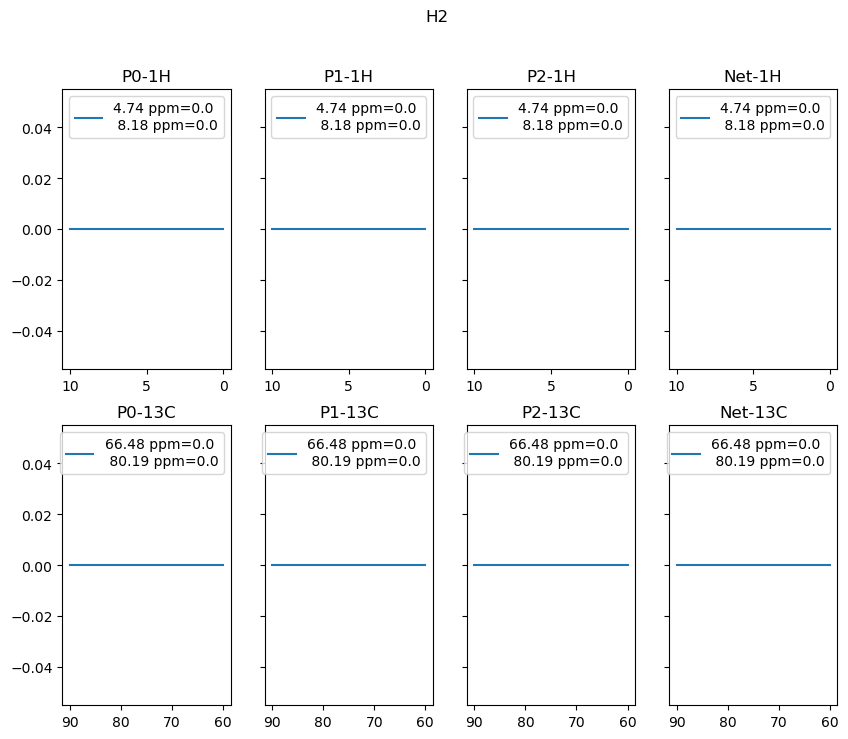

In [4]:
Algorithm("H2").add_sequence(H2).execute_algorithm()

## Step 2: Construct Oracles

### Step 2A: Construct $O_3$

$$O_3 =\begin{pmatrix} 1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1 \end{pmatrix}$$

In [5]:
O3 = PulseSequence("O3")\
    .add(Pulse("2IzSz(aka delay(1/2J))", IzSz, +np.pi))\
    .add(Pulse("Sy(-pi/2)", Sy, -np.pi/2))\
    .add(Pulse("Sx(+pi/2)", Sx, +np.pi/2))\
    .add(Pulse("Sy(+pi/2)", Sy, +np.pi/2))\
    .add(Pulse("Iy(-pi/2)", Iy, -np.pi/2))\
    .add(Pulse("Ix(+pi/2)", Ix, +np.pi/2))\
    .add(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\
    
O3.print_sequence()

O3 Pulse Sequence: 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2)

In [6]:
print("O3 multiplied by global phase...")
np.exp(-1j*np.pi/4)*O3.compile().get_operator()

O3 multiplied by global phase...


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [7]:
O3.compile().evolve_pho_th().rho

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.   0.   0.   0. ]
 [ 0.   0.6  0.   0. ]
 [ 0.   0.  -0.6  0. ]
 [ 0.   0.   0.  -1. ]]

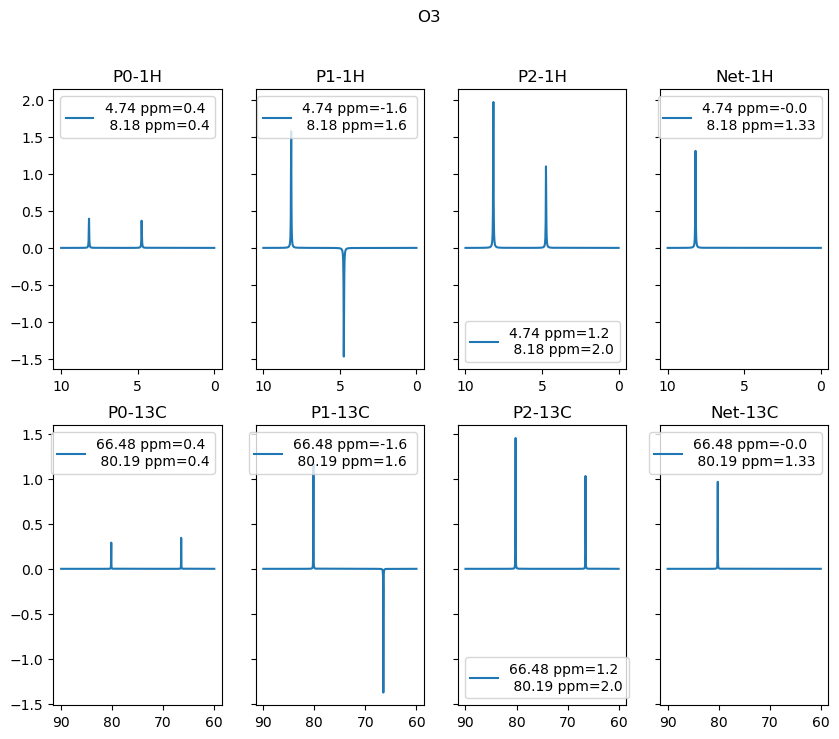

In [8]:
Algorithm("O3").add_sequence(O3).execute_algorithm()

## Step 3: Construct conditional phase shift operator $P$ 
$$P=\begin{pmatrix} 1&0&0&0\\0&-1&0&0\\0&0&-1&0\\0&0&0&-1 \end{pmatrix}$$

In [9]:
P = PulseSequence("P")\
    .add(Pulse("2IzSz(aka delay(1/2J))", IzSz, +np.pi))\
    .add(Pulse("Sy(-pi/2)", Sy, -np.pi/2))\
    .add(Pulse("Sx(-pi/2)", Sx, -np.pi/2))\
    .add(Pulse("Sy(+pi/2)", Sy, +np.pi/2))\
    .add(Pulse("Iy(-pi/2)", Iy, -np.pi/2))\
    .add(Pulse("Ix(-pi/2)", Ix, -np.pi/2))\
    .add(Pulse("Iy(+pi/2)", Iy, +np.pi/2))\

P.print_sequence()

P Pulse Sequence: 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2)

In [10]:
print("P multiplied by global phase...")
np.exp(-1j*5*np.pi/4)*P.compile().get_operator()

P multiplied by global phase...


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]

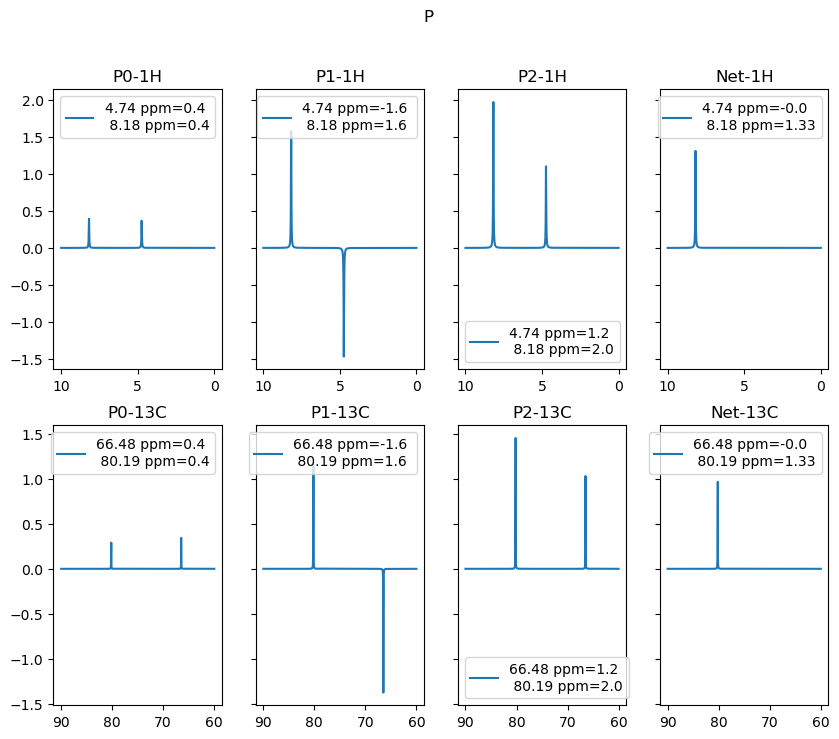

In [11]:
Algorithm("P").add_sequence(P).execute_algorithm()

## Step 4: Construct Grover operator: $G=H^{\otimes2}PH^{\otimes2}O$.


In [12]:

def grover_iteration(Ofk):
    return PulseSequence("G")\
    .add_seq(Ofk)\
    .add_seq(H2)\
    .add_seq(P)\
    .add_seq(H2)

G = grover_iteration(O3)
G.print_sequence()

G Pulse Sequence: 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2)

In [13]:
G.compile().get_operator()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.+0.5j 0.-0.5j 0.-0.5j 0.+0.5j]
 [0.-0.5j 0.+0.5j 0.-0.5j 0.+0.5j]
 [0.-0.5j 0.-0.5j 0.+0.5j 0.+0.5j]
 [0.-0.5j 0.-0.5j 0.-0.5j 0.-0.5j]]

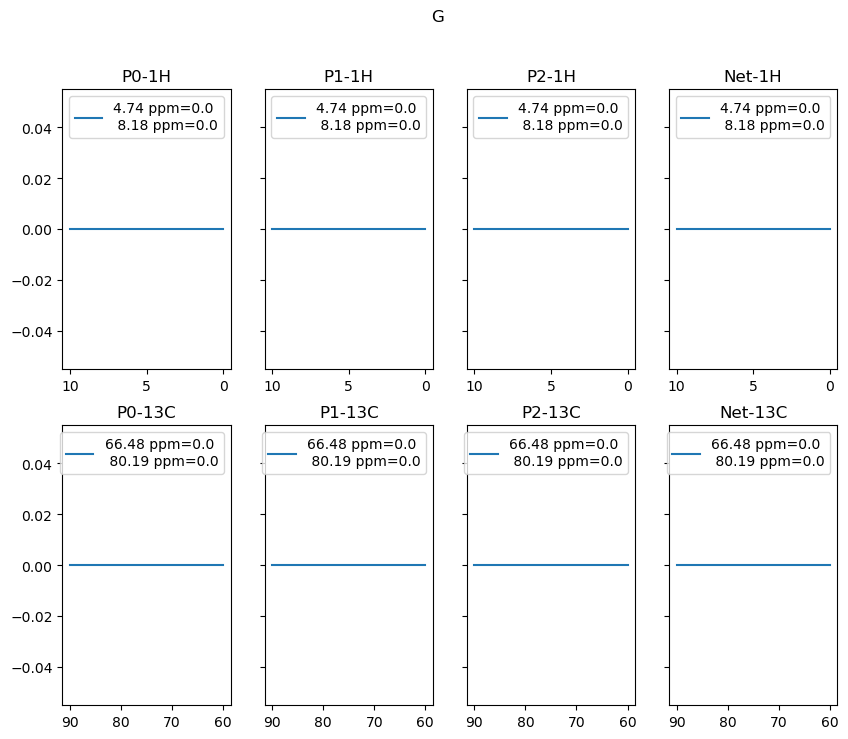

In [14]:
Algorithm("G").add_sequence(G).execute_algorithm()


## Step 5: Execute Grover's algorithm 

### Interpreting the code outputs and plots
My code outputs the exact pulse sequences for $P_0$, $P_1$ and $P_2$ permutation operators. This means that I am printing out the full Grover sequence for P0, P1 and P2 run. Similar case is with my plots as well which print out the resulting spectrum.

In [15]:
def grover_algorithm(Ofk: PulseSequence, iter=1):
    g = Algorithm(f"Grover -- {Ofk.name}, iter={iter}")\
        .state_prep("00")\
        .add_sequence(H2)\
        
    for _ in range(iter):
        g_op = grover_iteration(Ofk)
        g.add_sequence(g_op)\
        
    return g

### 5A: Executing one iteration for O3

 Grover -- O3, iter=1 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2)

Grover -- O3, iter=1 P1 Pulse Sequence: Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(+pi/2) -> Ix(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Iy(+pi/2) -> Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) 

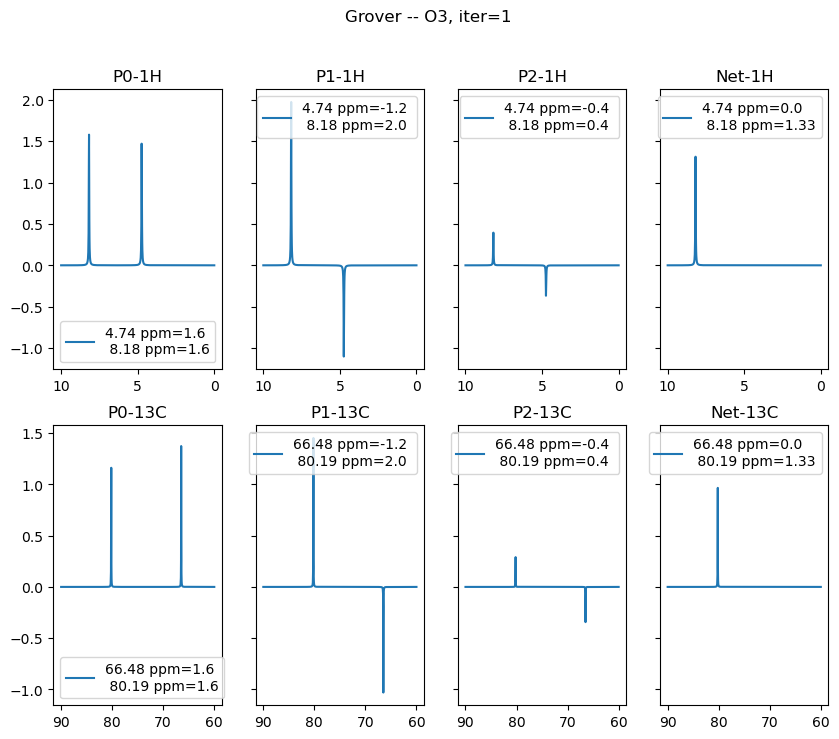

In [16]:
correction_g_O3 = qt.Qobj(-1/3*np.eye(4), dims=([[2, 2], [2, 2]]))

g_O3 = grover_algorithm(O3)
g_O3.print_sequences()
print("\n")
g_O3.execute_algorithm(correction_g_O3)

### 5B: Executing 4 iterations for O3

 Grover -- O3, iter=4 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(

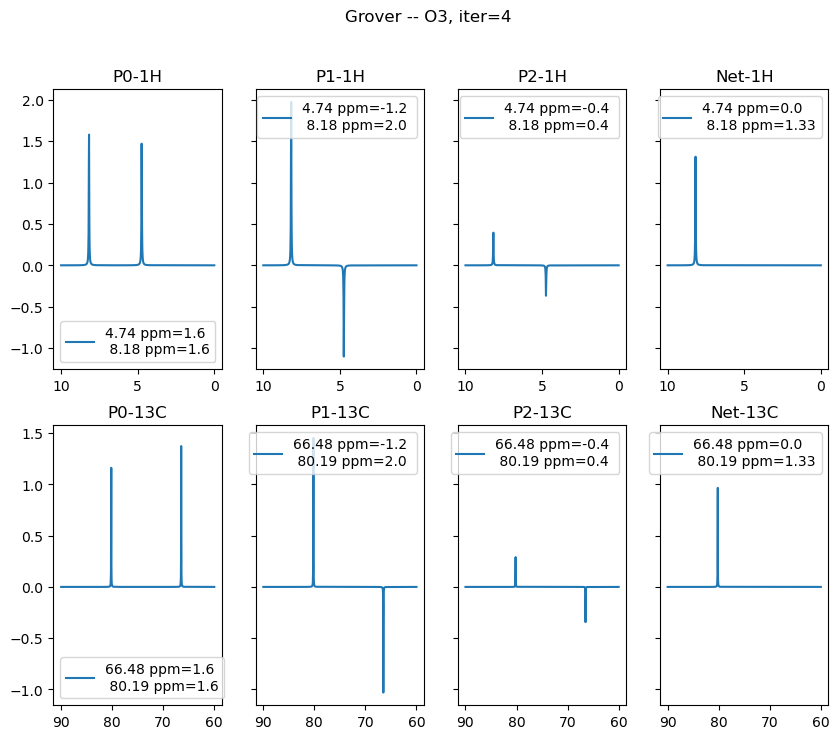

In [17]:
g_O3_iter4 = grover_algorithm(O3, iter=4)
g_O3_iter4.print_sequences()
print("\n")
g_O3_iter4.execute_algorithm(correction_g_O3)

### 5C: Executing 7 iterations for O3

 Grover -- O3, iter=7 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(

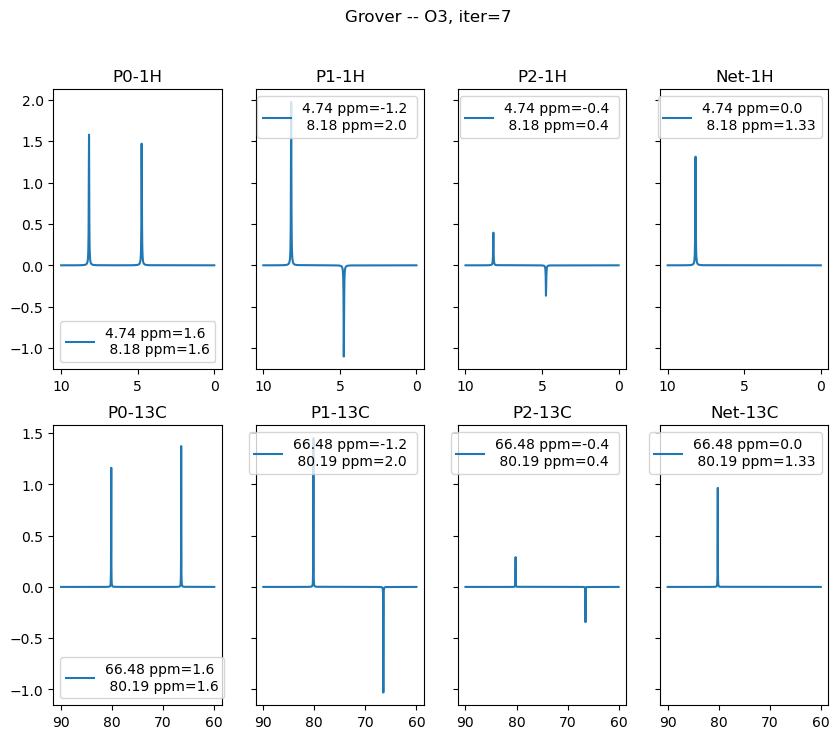

In [18]:
g_O3_iter7 = grover_algorithm(O3, iter=7)
g_O3_iter7.print_sequences()
print("\n")
g_O3_iter7.execute_algorithm(correction_g_O3)

### 5D: Executing 10 iterations for O3

 Grover -- O3, iter=10 P0 Pulse Sequence: Ix(pi) -> Sx(pi) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(-pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(-pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix(+pi/2) -> Sy(+pi/2) -> Sx(+pi/2) -> Sx(+pi/2) -> 2IzSz(aka delay(1/2J)) -> Sy(-pi/2) -> Sx(+pi/2) -> Sy(+pi/2) -> Iy(-pi/2) -> Ix(+pi/2) -> Iy(+pi/2) -> Iy(+pi/2) -> Ix(+pi/2) -> Ix

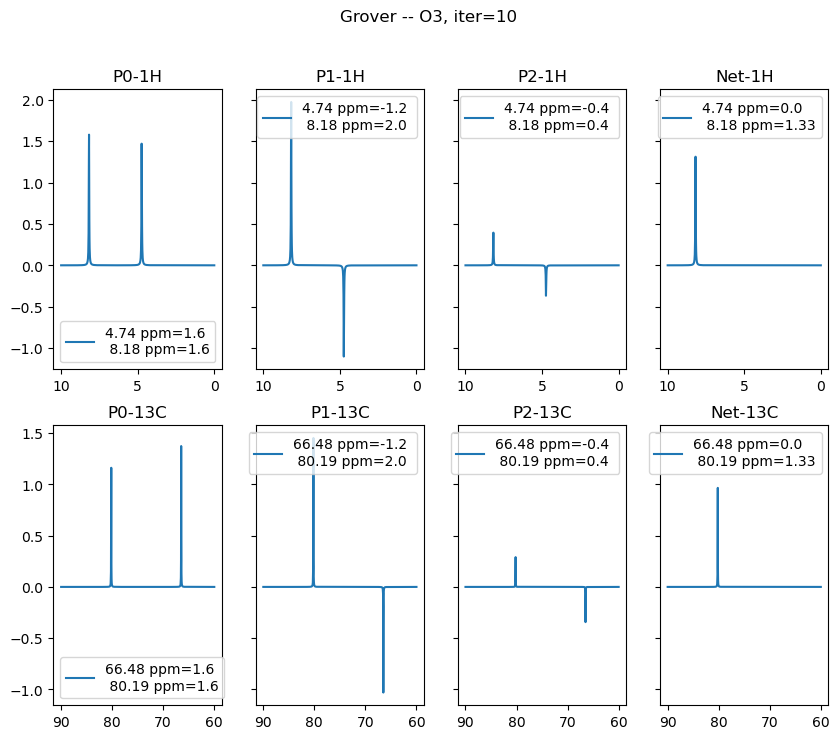

In [19]:
g_O3_iter10 = grover_algorithm(O3, iter=10)
g_O3_iter10.print_sequences()
print("\n")
g_O3_iter10.execute_algorithm(correction_g_O3)